In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import stan_jupyter as stan
import pandas as pd

## Question 1

In [2]:
df_full = pd.read_csv("../data/Howell1.csv", delimiter=";")
df = df_full[df_full.age>=18].copy()

In [3]:
with open("models/w2_1.stan", "r") as f:
    model_code = f.read()

model_data = {"N":len(df),
              "weight":df.weight.tolist(),
              "height":df.height.tolist(),
              "X_BAR":df.height.mean()
             }
              

In [11]:
m1_build = stan.build(model_code, model_data)

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: warning: unused variable 'error' [-Wunused-variable]
  bool error = false;
       ^
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/pri

Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:96:39: warning: lambda capture 'a' is not used [-Wunused-

Building: 2.4s
Building: 2.5s
Building: 2.6s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:54:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun.hpp:120:
/Users/jikaasik/miniconda/lib/python3.9/site-p

Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:121:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/matrix_power.hpp:52:24: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'const int' [-Wsign-compare]
  for (size_t i = 2; i <= n; ++i) {
                     ~ ^  ~
In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Us

Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:11:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor.hpp:28:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor/operands_and_partials.hpp:29:1: warning: 'ops_partials_edge' defined as a class template here but previously declared as a struct template; this is valid, but may result in linker errors under the Microsoft C++ ABI [-Wmismatched-tags]
class ops_partials_edge<double, var> {
^
/Users/jikaasik/miniconda/lib/python3.9/site-package

Building: 4.5s
Building: 4.6s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:139:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/hmm_marginal.hpp:26:13: warning: unused variable 'n_states' [-Wunused-variable]
  const int n_states = omegas.rows();
            ^


Building: 4.7s
Building: 4.8s
Building: 5.0s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:307:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_lccdf.hpp:78:13: warning: unused varia

Building: 5.1s
Building: 5.2s
Building: 5.3s


/Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:221:20: warning: unused variable 'jacobian__' [-Wunused-variable]
    constexpr bool jacobian__ = false;
                   ^
In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:29:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_divide_equal.hpp:5:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/h

Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:80:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += vi.adj_; });
                    ^
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/grad_inc_beta.hpp:45:43: note: in instantiation of fun

Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5:
In file included from /Users/jikaasik/

Building: 6.6s
Building: 6.7s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/fph7vdeb/model_fph7vdeb.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5:
In file included from /Users/jikaasik/

Building: 6.8s
Building: 6.9s
Building: 7.0s
Building: 7.1s
Building: 7.2s
Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s


57 warnings generated.
ld: warning: object file (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (12.0) than being linked (10.9)
ld: warning: dylib (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(lon

In [12]:
m1 = m1_build.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Rejecting initial value:
    Error evaluating the log probability at the initial value.
  Exception: lognormal_lpdf: Random variable is -0.72202, but must be nonnegative! (in '/var/folders/lx/ncfwc0_n057_shk9g1g0926r0000gn/T/httpstan_4vnuij6m/model_fph7vdeb.stan', line 17, column 2 to column 25)
  Gradient evaluation took 5.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Random variable is -392490, but must be nonnegative! (in '/var/folders/lx/ncfwc0_n057_shk9g1g0926r0000gn/T/httpstan_4vnuij6m/model_fph7vdeb.stan', line 17, column 2 to column 25)
  If this warning occu

In [13]:
az.summary(m1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,45.003,0.227,44.564,45.412,0.003,0.002,4394.0,2980.0,1.0
beta,0.628,0.029,0.575,0.685,0.000,0.000,3657.0,2828.0,1.0
sigma,4.256,0.158,3.968,4.545,0.002,0.002,4407.0,3111.0,1.0
y_pred[0],43.235,4.281,35.327,51.115,0.067,0.047,4103.0,3881.0,1.0
y_pred[1],35.692,4.235,27.502,43.322,0.066,0.047,4124.0,3925.0,1.0
...,...,...,...,...,...,...,...,...,...
y_pred[347],49.874,4.302,41.721,57.915,0.069,0.049,3862.0,3915.0,1.0
y_pred[348],37.626,4.273,29.777,45.630,0.067,0.047,4102.0,3814.0,1.0
y_pred[349],49.943,4.276,42.032,57.781,0.068,0.048,3983.0,4015.0,1.0
y_pred[350],45.934,4.216,38.169,53.949,0.065,0.046,4178.0,3774.0,1.0


In [27]:
heights = [140, 160, 175]

for height in heights:
    pred_weight = stats.norm.rvs(loc = m1['alpha'] + m1['beta']*(height-df.height.mean()),
                                 scale=m1['sigma'])
    print(f"The average predicted weight for someone {height}cm tall is {pred_weight.mean().round(2)}kg.")
    print(f"The compatibility interval (HPDI) for such a weight is {az.hdi(pred_weight, .89)}.\n")

The average predicted weight for someone 140cm tall is 35.78kg.
The compatibility interval (HPDI) for such a weight is [28.74610078 42.50740923].

The average predicted weight for someone 160cm tall is 48.38kg.
The compatibility interval (HPDI) for such a weight is [41.46921159 54.92185985].

The average predicted weight for someone 175cm tall is 57.77kg.
The compatibility interval (HPDI) for such a weight is [50.76515799 64.7014636 ].



## Question 2

In [67]:
df = df_full[df_full.age<13].copy()

For the total effect of age on weight, we include the part the is mediated by height. So, for the moment, we exclude height from the model.

Priors:
- alpha ~ normal(50, 10)
- beta ~ normal(0, 5)
- sigma ~ uniform(0, 20)

Text(0.5, 1.0, 'Prior probability of weight')

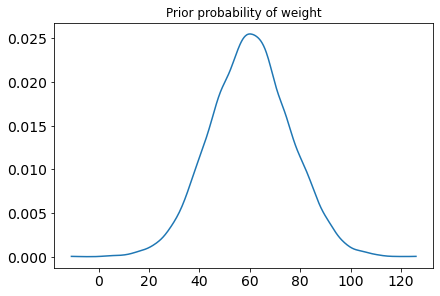

In [75]:
sample_alpha = stats.norm.rvs(loc=60, scale=15, size=10000)
sample_beta = stats.norm.rvs(loc=2, scale=2, size=10000)
sample_sigma = stats.uniform.rvs(loc=0, scale=10, size=10000)
prior_weight = stats.norm.rvs(loc=sample_alpha, scale=sample_sigma)
az.plot_kde(prior_weight)
plt.title("Prior probability of weight")

Text(0.5, 0, 'Age')

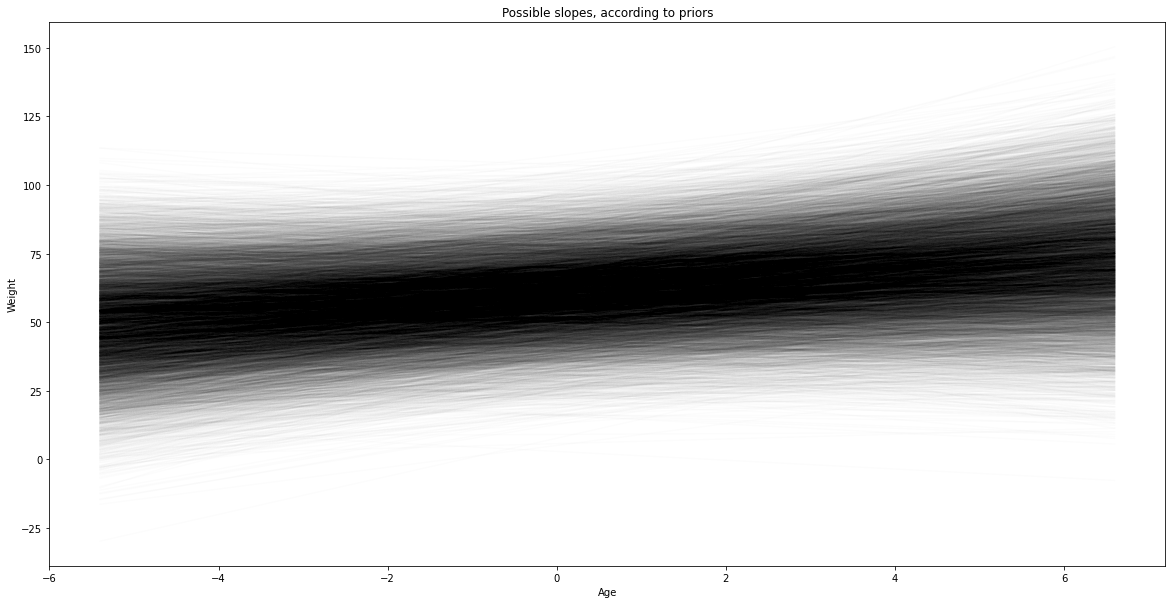

In [80]:
plt.figure(figsize=(20,10))
for i in range(1, 10000):
    plt.plot(
        df.age-df.age.mean(),
        sample_alpha[i]+sample_beta[i]*(df.age-df.age.mean()),
        color='black',
        alpha=.01)
plt.title("Possible slopes, according to priors")
plt.ylabel("Weight")
plt.xlabel("Age")

In [81]:
with open("models/w2_2.stan", "r") as f:
    model_code = f.read()

model_data = {"N":len(df),
              "weight":df.weight.tolist(),
              "age":df.age.tolist(),
              "X_BAR":df.age.mean()
             }

In [82]:
m2_build = stan.build(model_code, model_data)

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: warning: unused variable 'error' [-Wunused-variable]
  bool error = false;
       ^
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/pri

Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:96:39: warning: lambda capture 'a' is not used [-Wunused-

Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:54:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun.hpp:120:
/Users/jikaasik/miniconda/lib/python3.9/site-p

Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:121:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/matrix_power.hpp:52:24: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'const int' [-Wsign-compare]
  for (size_t i = 2; i <= n; ++i) {
                     ~ ^  ~
In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Us

Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:11:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor.hpp:28:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor/operands_and_partials.hpp:29:1: warning: 'ops_partials_edge' defined as a class template here but previously declared as a struct template; this is valid, but may result in linker errors under the Microsoft C++ ABI [-Wmismatched-tags]
class ops_partials_edge<double, var> {
^
/Users/jikaasik/miniconda/lib/python3.9/site-package

Building: 4.6s
Building: 4.7s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:139:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/hmm_marginal.hpp:26:13: warning: unused variable 'n_states' [-Wunused-variable]
  const int n_states = omegas.rows();
            ^


Building: 4.8s
Building: 5.0s
Building: 5.1s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:307:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_lccdf.hpp:78:13: warning: unused varia

Building: 5.2s
Building: 5.3s
Building: 5.4s


/Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:220:20: warning: unused variable 'jacobian__' [-Wunused-variable]
    constexpr bool jacobian__ = false;
                   ^
In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:29:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_divide_equal.hpp:5:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/h

Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:80:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += vi.adj_; });
                    ^
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/grad_inc_beta.hpp:45:43: note: in instantiation of fun

Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5:
In file included from /Users/jikaasik/

Building: 6.7s
Building: 6.8s
Building: 6.9s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/w6zntmic/model_w6zntmic.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5:
In file included from /Users/jikaasik/

Building: 7.0s
Building: 7.1s
Building: 7.2s
Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s


57 warnings generated.
ld: warning: object file (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (12.0) than being linked (10.9)
ld: warning: dylib (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(lon

In [83]:
m2 = m2_build.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is -0.652414, but must be positive! (in '/var/folders/lx/ncfwc0_n057_shk9g1g0926r0000gn/T/httpstan_lmw96vhb/model_w6zntmic.stan', line 21, column 2 to column 53)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog ste

In [84]:
az.summary(m2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,14.702,0.213,14.279,15.077,0.003,0.002,4073.0,3007.0,1.0
beta,1.340,0.055,1.236,1.438,0.001,0.001,4514.0,2874.0,1.0
sigma,2.564,0.155,2.278,2.853,0.002,0.002,4352.0,2884.0,1.0
y_pred[0],23.540,2.630,18.542,28.439,0.042,0.030,3918.0,3961.0,1.0
y_pred[1],18.183,2.599,13.347,22.957,0.042,0.029,3915.0,3925.0,1.0
...,...,...,...,...,...,...,...,...,...
y_pred[141],15.495,2.623,10.451,20.374,0.043,0.030,3802.0,3970.0,1.0
y_pred[142],16.887,2.582,12.190,21.769,0.042,0.030,3757.0,3639.0,1.0
y_pred[143],8.808,2.590,3.927,13.891,0.040,0.028,4265.0,4141.0,1.0
y_pred[144],8.831,2.624,3.606,13.460,0.042,0.030,3944.0,3941.0,1.0


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'y_pred'}>,
        <AxesSubplot:title={'center':'y_pred'}>]], dtype=object)

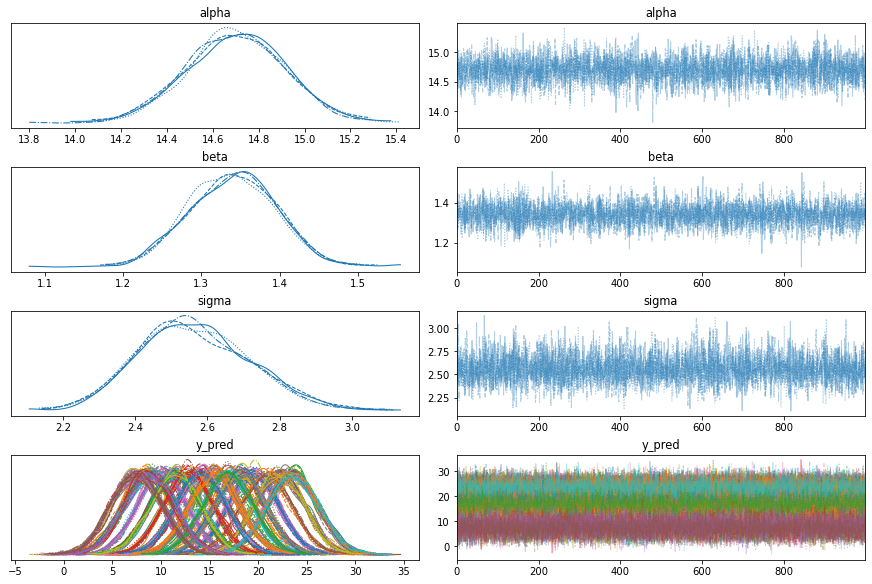

In [95]:
az.plot_trace(m2)

## Question 3

In [97]:
df["sex"] = np.where(df.male==0,1,2)

In [109]:
with open("models/w2_3.stan", "r") as f:
    model_code = f.read()

model_data = {"N":len(df),
              "weight":df.weight.tolist(),
              "age":df.age.tolist(),
              "sex":df.sex.tolist(),
              "X_BAR":df.age.mean()
             }

In [110]:
m3_build = stan.build(model_code, model_data)

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: warning: unused variable 'error' [-Wunused-variable]
  bool error = false;
       ^
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/pri

Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:96:39: warning: lambda capture 'a' is not used [-Wunused-

Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:54:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun.hpp:120:
/Users/jikaasik/miniconda/lib/python3.9/site-p

Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:121:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/matrix_power.hpp:52:24: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'const int' [-Wsign-compare]
  for (size_t i = 2; i <= n; ++i) {
                     ~ ^  ~
In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Us

Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:11:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor.hpp:28:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor/operands_and_partials.hpp:29:1: warning: 'ops_partials_edge' defined as a class template here but previously declared as a struct template; this is valid, but may result in linker errors under the Microsoft C++ ABI [-Wmismatched-tags]
class ops_partials_edge<double, var> {
^
/Users/jikaasik/miniconda/lib/python3.9/site-package

Building: 4.6s
Building: 4.7s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:139:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/hmm_marginal.hpp:26:13: warning: unused variable 'n_states' [-Wunused-variable]
  const int n_states = omegas.rows();
            ^


Building: 4.8s
Building: 4.9s
Building: 5.0s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:307:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_lccdf.hpp:78:13: warning: unused varia

Building: 5.1s
Building: 5.3s


/Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:251:20: warning: unused variable 'jacobian__' [-Wunused-variable]
    constexpr bool jacobian__ = false;
                   ^
In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:29:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_divide_equal.hpp:5:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/h

Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:80:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += vi.adj_; });
                    ^
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/grad_inc_beta.hpp:45:43: note: in instantiation of fun

Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5:
In file included from /Users/jikaasik/

Building: 6.6s
Building: 6.7s
Building: 6.8s


In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:58:
/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/set_zero_all_adjoints.hpp:14:13: warning: 'static' function 'set_zero_all_adjoints' declared in header file should be declared 'static inline' [-Wunneeded-internal-declaration]
static void set_zero_all_adjoints() {
            ^
In file included from /Users/jikaasik/Library/Caches/httpstan/4.6.1/models/ilkmlf4t/model_ilkmlf4t.cpp:2:


Building: 6.9s
Building: 7.0s
Building: 7.1s
Building: 7.2s
Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.6s
Building: 9.7s
Building: 9.8s


59 warnings generated.
ld: warning: object file (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (12.0) than being linked (10.9)
ld: warning: dylib (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/Users/jikaasik/miniconda/lib/python3.9/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(lon

In [111]:
m3 = m3_build.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Rejecting initial value:
    Error evaluating the log probability at the initial value.
  Exception: normal_lpdf: Scale parameter is -0.0171102, but must be positive! (in '/var/folders/lx/ncfwc0_n057_shk9g1g0926r0000gn/T/httpstan_atur50tp/model_ilkmlf4t.stan', line 29, column 2 to column 29)
  Rejecting initial value:
    Error evaluating the log probability at the initial value.
  Exception: normal_lpdf: Scale parameter is -0.627698, but must be positive! (in '/var/folders/lx/ncfwc0_n057_shk9g1g0926r0000gn/T/httpstan_atur50tp/model_ilkmlf4t.stan', line 29, column 2 to column 29)
  Gradient evaluation took 0.001685 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.85 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis pro

In [113]:
az.summary(m3)[0:10]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],14.031,0.287,13.469,14.549,0.004,0.003,5558.0,3017.0,1.0
alpha[1],15.405,0.301,14.877,15.983,0.004,0.003,5522.0,2949.0,1.0
beta[0],1.289,0.074,1.145,1.421,0.001,0.001,5231.0,3195.0,1.0
beta[1],1.388,0.078,1.244,1.537,0.001,0.001,4731.0,3066.0,1.0
sigma,2.478,0.150,2.199,2.753,0.002,0.002,4706.0,2545.0,1.0
mu[0],24.562,0.587,23.378,25.582,0.009,0.006,4661.0,3098.0,1.0
mu[1],17.381,0.353,16.669,18.012,0.005,0.003,5660.0,2785.0,1.0
mu[2],15.448,0.302,14.836,15.978,0.004,0.003,5678.0,2906.0,1.0
mu[3],16.092,0.316,15.471,16.659,0.004,0.003,5696.0,2765.0,1.0
mu[4],23.174,0.522,22.214,24.183,0.008,0.005,4699.0,2977.0,1.0


Text(0.5, 0, 'Weight')

<Figure size 1440x720 with 0 Axes>

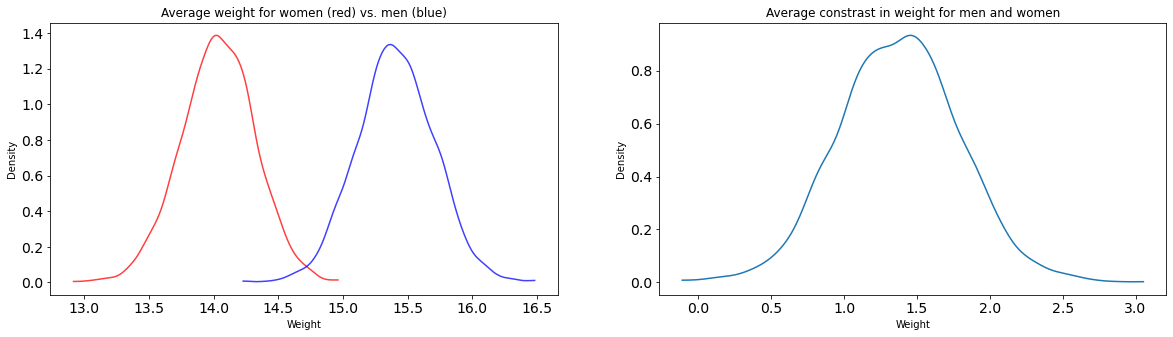

In [148]:
alpha_contrast = m3['alpha'][1] - m3['alpha'][0]

plt.figure(figsize=(20,10))
_, ax = plt.subplots(1, 2, figsize=(20,5))

az.plot_kde(m3['alpha'][0], plot_kwargs={"color":"red", "alpha":.75}, ax=ax[0])
ax[0].set_title("Average weight for women (red) vs. men (blue)")
ax[0].set_ylabel("Density")
ax[0].set_xlabel("Weight")

az.plot_kde(m3['alpha'][1], plot_kwargs={"color":"blue", "alpha":.75}, ax=ax[0])
az.plot_kde(alpha_contrast, ax=ax[1])
ax[1].set_title("Average constrast in weight for men and women")
ax[1].set_ylabel("Density")
ax[1].set_xlabel("Weight")

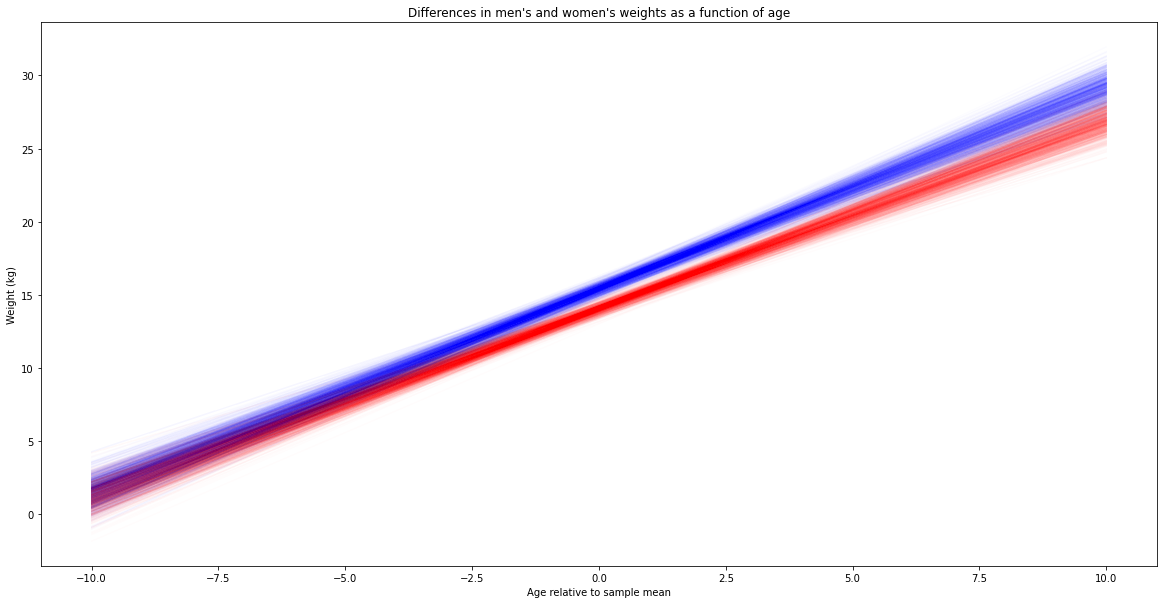

In [176]:
samples = np.random.randint(0,4000,1000)
x = np.linspace(-10, 10, 1000) 
plt.figure(figsize=(20,10))
plt.title("Differences in men's and women's weights as a function of age")
plt.ylabel("Weight (kg)")
plt.xlabel("Age relative to sample mean")

for i in samples:
    plt.plot(
        x,
        m3['alpha'][0][i]+m3['beta'][0][i]*x,
        color='red',
        alpha=.01)
    plt.plot(
        x,
        m3['alpha'][1][i]+m3['beta'][1][i]*x,
        color='blue',
        alpha=.01)

## Question 4